# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset diambil dari kaggle dengan link: https://www.kaggle.com/datasets/varishabatool/disorder/data

Dataset Sleep Disorder Diagnosis ini berisi 374 baris dan 13 kolom, yang mencakup detail tentang pola tidur, kebiasaan gaya hidup, dan indikator kesehatan terkait.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
from google.colab import files

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d varishabatool/disorder
!unzip disorder.zip


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/varishabatool/disorder
License(s): CC0-1.0
disorder.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  disorder.zip
replace Sleep_health_and_lifestyle_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Sleep_health_and_lifestyle_dataset.csv  


In [3]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe(include="all")

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


### Cek Missing Value

In [6]:
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


### Cek Duplikat

In [7]:
df.duplicated().sum()

np.int64(0)

### Pisahkan Kolom Numerik dan Kategorikal untuk EDA

In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

### Cek Outliers

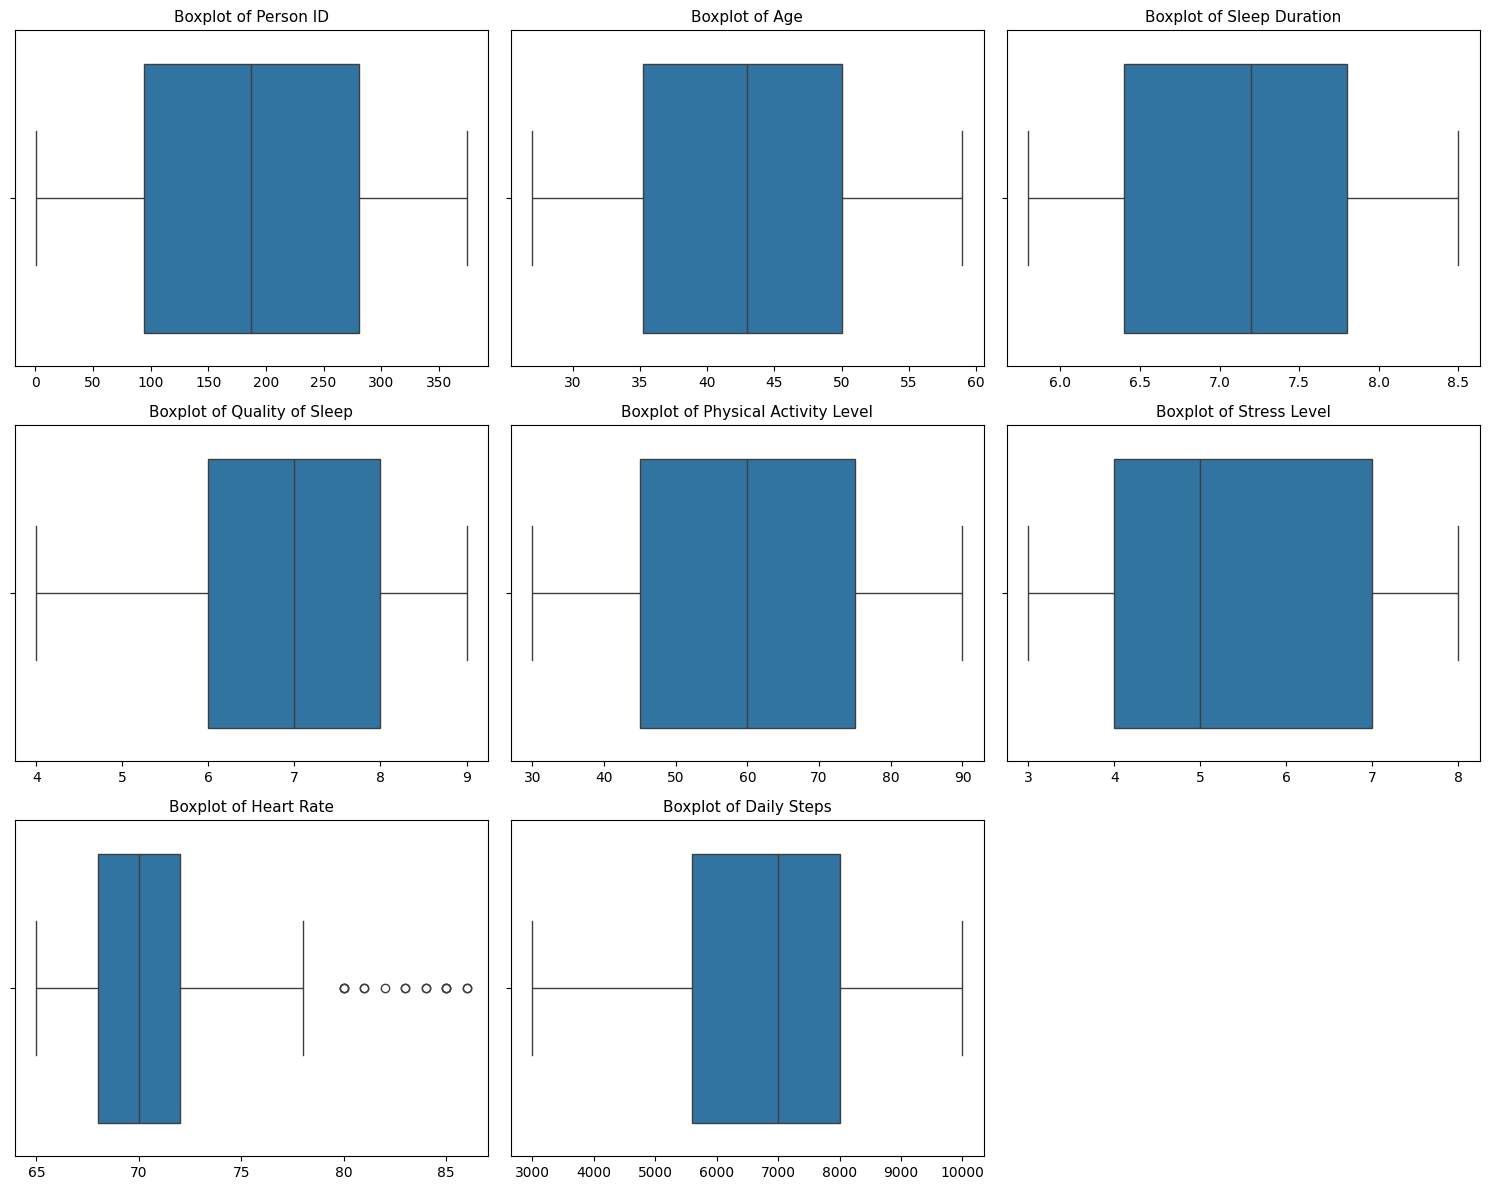

In [9]:
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Univariate Analysis
Kolom Numerik

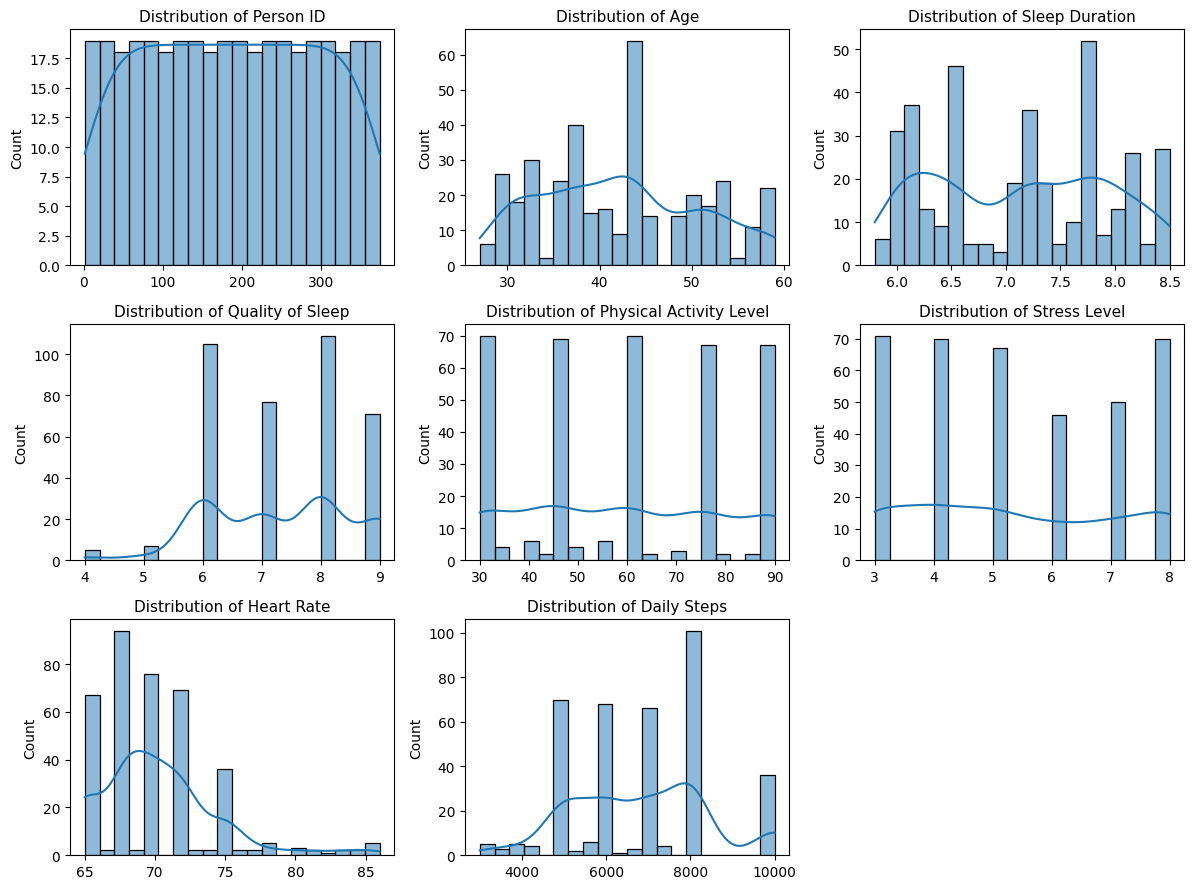

In [10]:
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(4 * n_cols, 3 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Kolom Kategorikal

/tmp/ipython-input-1511992543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette='viridis')
/tmp/ipython-input-1511992543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette='viridis')
/tmp/ipython-input-1511992543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette='viridis')
/tmp/ipython-input-1511992543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

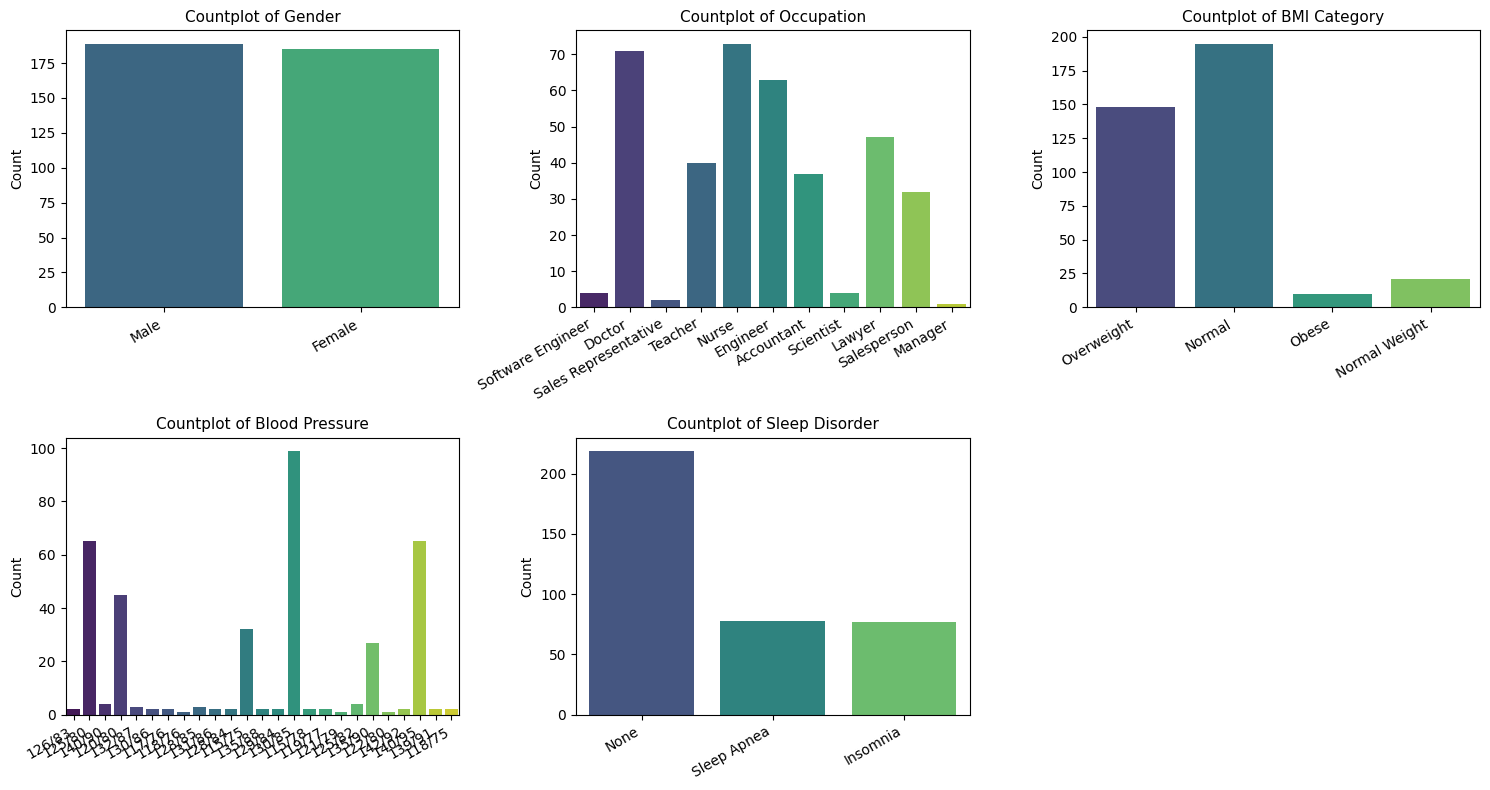

In [11]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[col].fillna('None')
    sns.countplot(x=data, palette='viridis')
    plt.title(f'Countplot of {col}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

### Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

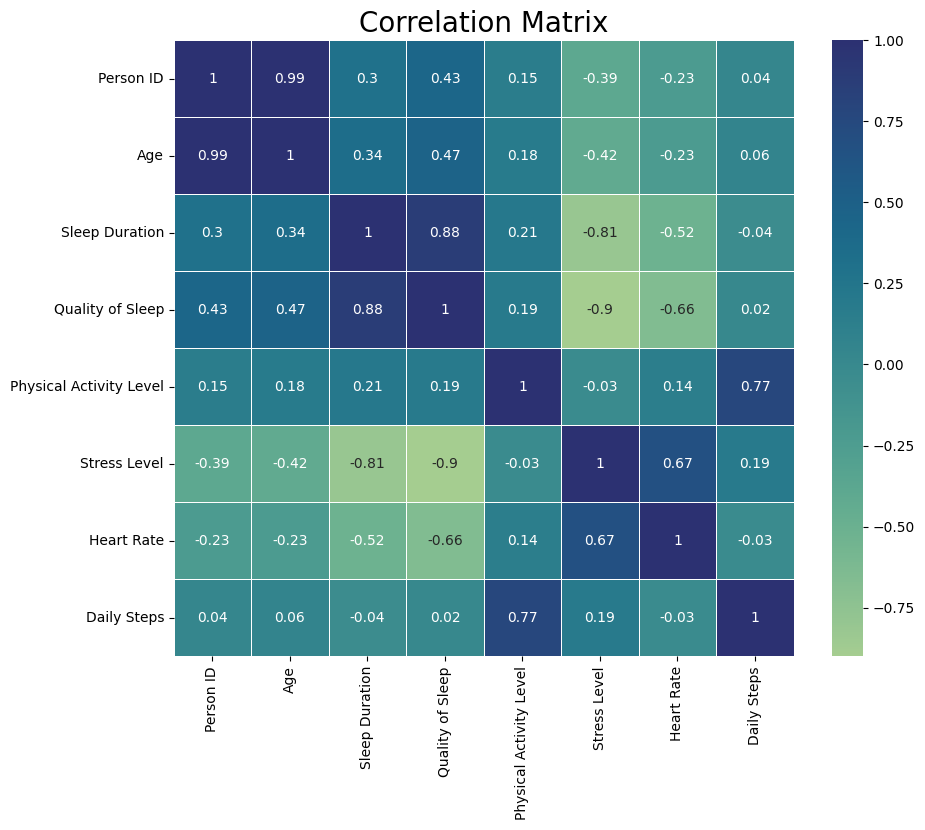

In [12]:
corr_matrix = df[numeric_cols].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='crest', linewidth=0.5)
plt.title("Correlation Matrix", size=20)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Menangani Missing Values

Data kosong di kolom sleep disorder diganti menjadi None untuk menandakan tidak ada sleep disorder

In [13]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [14]:
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


*   Karena tidak ada data duplikat, tidak perlu menghapus data duplikat
*   Outlier hanya ada di kolom heart rate, namun karena informasi tersebut jika diubah-ubah akan berpengaruh pada hasil, maka outliers pada dataset ini tidak akan diubah



### Pisahkan kolom Blood Pressure menjadi Systol dan Diastol

In [15]:
df[['BP Sistol', 'BP Diastol']] = df['Blood Pressure'].str.split('/', expand=True)

df['BP Sistol'] = pd.to_numeric(df['BP Sistol'], errors='coerce').astype('Int64')
df['BP Diastol'] = pd.to_numeric(df['BP Diastol'], errors='coerce').astype('Int64')

df.drop(columns=['Blood Pressure'], inplace=True)

df[['BP Sistol', 'BP Diastol']].head()

,BP Sistol,BP Diastol
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90


### Menghapus Kolom
Drop kolom yang tidak berguna

In [16]:
df = df.drop(columns=['Person ID'])

### Menangani Label Duplikat

In [17]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [18]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

In [19]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,216
Overweight,148
Obese,10


### Encoding

Karena setiap kolom memiliki jenis data yang berbeda, maka digunakan beberapa jenis encoding sesuai karakteristiknya:

| Kolom | Jenis Data | Metode Encoding | Alasan |
|-------|-------------|------------------|--------|
| `Gender` | Nominal (2 kategori) | **Label Encoding** | Karena hanya memiliki 2 nilai: Male/Female |
| `Occupation` | Nominal (banyak kategori) | **One-Hot Encoding** | Tidak memiliki urutan, sehingga lebih aman dengan representasi biner |
| `BMI Category` | Ordinal (berurutan) | **Ordinal Encoding** | Memiliki urutan logis:  Normal < Overweight < Obese |


In [20]:
# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encoding
df = pd.get_dummies(df, columns=['Occupation'])

# Ordinal Encoding
bmi_order = [['Overweight', 'Normal', 'Obese']]
encoder = OrdinalEncoder(categories=bmi_order)
df['BMI Category'] = encoder.fit_transform(df[['BMI Category']])

df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,27,6.1,6,42,6,0.0,77,4200,No Disorder,...,False,False,False,False,False,False,False,False,True,False
1,1,28,6.2,6,60,8,1.0,75,10000,No Disorder,...,True,False,False,False,False,False,False,False,False,False
2,1,28,6.2,6,60,8,1.0,75,10000,No Disorder,...,True,False,False,False,False,False,False,False,False,False
3,1,28,5.9,4,30,8,2.0,85,3000,Sleep Apnea,...,False,False,False,False,False,True,False,False,False,False
4,1,28,5.9,4,30,8,2.0,85,3000,Sleep Apnea,...,False,False,False,False,False,True,False,False,False,False


### Pemisahan Fitur dan Target

In [21]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

### Split Data Train Testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [24]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (299, 22)
X_test : (75, 22)
y_train: (299,)
y_test : (75,)


### Normalisasi
Normalisasi hanya dilakukan di training data untuk mencegah data leakage

In [25]:
scaler = StandardScaler()

#Karena tadi hapus kolom person ID jadi didefinisikan ulang
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Fit hanya pada training data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train_scaled.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BP Sistol,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1.044466,0.055811,-0.833457,-1.155098,-0.728644,0.956601,-1.177651,0.481081,-0.554643,0.186918,...,False,False,False,False,False,False,True,False,False,False
1,1.044466,-1.111141,-1.468533,-1.155098,-1.450369,1.522984,0.725688,0.481081,-1.180447,-0.448177,...,True,False,False,False,False,False,False,False,False,False
2,1.044466,-0.877751,0.436694,0.537913,-0.006920,-0.176166,0.725688,-0.014076,0.696966,-1.083272,...,False,False,False,False,False,False,False,False,True,False
3,-0.957427,1.922934,1.325801,1.384419,0.714805,-1.308933,-1.177651,-0.509234,0.071162,1.457107,...,False,False,False,False,True,False,False,False,False,False
4,-0.957427,-1.577922,-0.833457,-2.001604,-0.969219,0.956601,0.725688,2.461710,-1.806251,0.440955,...,False,False,False,False,True,False,False,False,False,False


### Menyimpan Hasil

In [ ]:
df_train = pd.concat([X_train_scaled, y_train], axis=1)
df_test = pd.concat([X_test_scaled, y_test], axis=1)

os.makedirs("Sleep_health_and_lifestyle_dataset_preprocessing", exist_ok=True)

df_train.to_csv("Sleep_health_and_lifestyle_dataset_preprocessing/Sleep_health_and_lifestyle_dataset_train.csv", index=False)
df_test.to_csv("Sleep_health_and_lifestyle_dataset_preprocessing/Sleep_health_and_lifestyle_dataset_test.csv", index=False)